# Stock Market Risk Analysis And Prediction

In [6]:
# https://github.com/sruti-jain/Stock-Market-Analysis---Web-mining---Risk-Analysis-Future-Prediction
from __future__ import division

#import libraries
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader  as pdr
from datetime import datetime


C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [7]:
import pandas_datareader.data as web
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

for stock in tech_list:   
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)

In [8]:
#Descriptive & Exploratory analysis
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,271.367945,265.131818,267.866245,268.547114,3.458543e+07,267.306048
std,46.725707,45.531970,46.001468,46.295403,1.719988e+07,46.846296
min,198.070007,192.580002,195.410004,193.339996,1.136200e+07,191.059784
25%,226.419998,220.789993,224.800003,223.970001,2.328030e+07,222.169479
50%,270.000000,263.450012,266.600006,266.920013,2.970670e+07,265.569122
75%,312.670013,304.880005,308.100006,309.540009,4.052910e+07,308.062988
max,372.380005,363.910004,367.850006,366.529999,1.067212e+08,366.529999


In [9]:
#DataFrame Structure
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-07-03 to 2020-07-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


In [10]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-03,204.440002,202.690002,203.279999,204.410004,11362000.0,201.999237
2019-07-05,205.080002,202.899994,203.350006,204.229996,17265500.0,201.821350
2019-07-08,201.399994,198.410004,200.809998,200.020004,25338600.0,197.661011
2019-07-09,201.509995,198.809998,199.199997,201.240005,20578000.0,198.866638
2019-07-10,203.729996,201.559998,201.850006,203.229996,17897100.0,200.833160


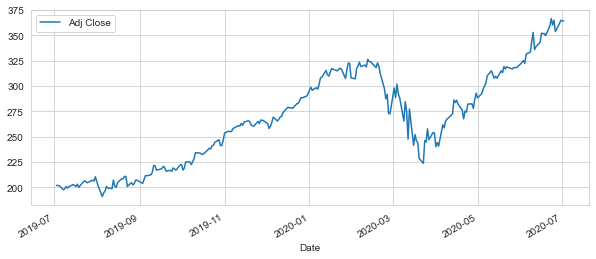

In [11]:
# Let's see historical view of the closing price for the last one year
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

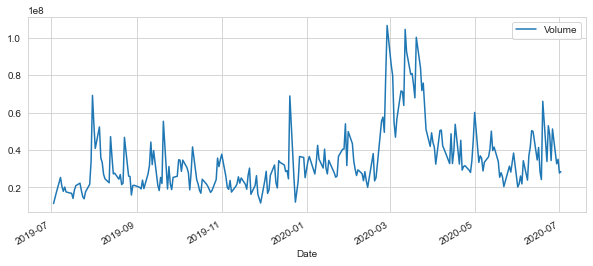

In [12]:
# Now let's plot the total volume of stock being traded each day over the past year
AAPL['Volume'].plot(legend=True,figsize=(10,4));

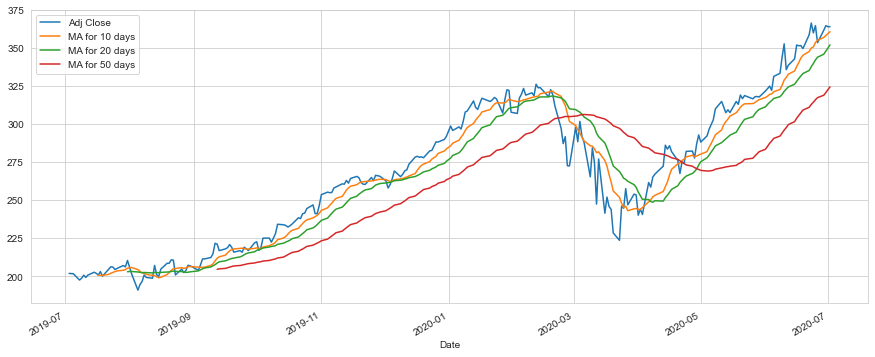

In [14]:
#Calculate and plot the simple moving average (SMA) for upto 10, 20 and 50 days
moving_avg_day = [10,20,50]

for ma in moving_avg_day:
    column_name = "MA for %s days" % (str(ma))
    #AAPL[column_name] =pd.rolling_mean(AAPL['Adj Close'],ma)
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()
    
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(15,6));

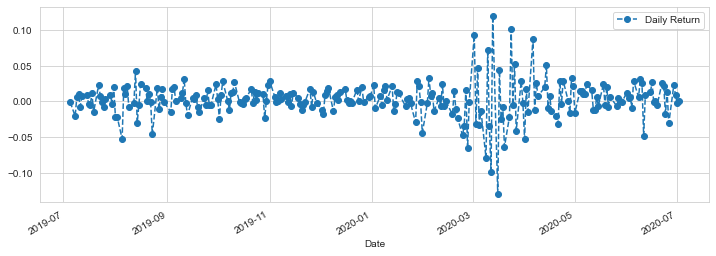

In [15]:
#Now lets analyse the Daily Return Analysis as our first step to determing the volatility of the stock prices

# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o');

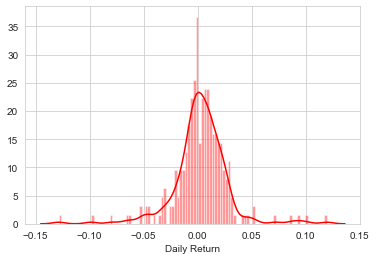

In [16]:
#Average daily return
#Using dropna to eliminate NaN values
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='red');

In [17]:
#Now lets do a comparative study to analyze the returns of all the stocks in our list

# Grab all the closing prices for the tech stocks into one new DataFrame
closing_df = web.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [18]:
# Let's take a quick look
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-03,201.999237,1121.579956,135.789062,1939.000000
2019-07-05,201.821350,1131.589966,135.393936,1942.910034
2019-07-08,197.661011,1116.349976,135.295151,1952.319946
2019-07-09,198.866638,1124.829956,134.801239,1988.300049
2019-07-10,200.833160,1140.479980,136.174347,2017.410034


In [19]:
# Make a new DataFrame for storing stock daily return
tech_rets = closing_df.pct_change()

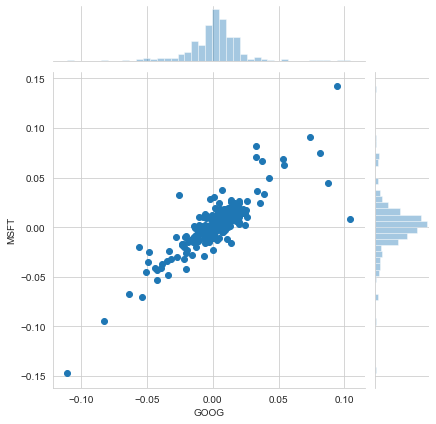

In [20]:
# Using joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

The correlation coefficient of 0.6 indicates a strong correlation between the daily return values of Microsoft and Google. This inplies that if google's stock value increases, microsoft's stock value and hence daily return increases and vice versa. This analysis can further be extended by first segmentation of stock based on industry and then further analysis can be done to determine the choice of stock within that industry.

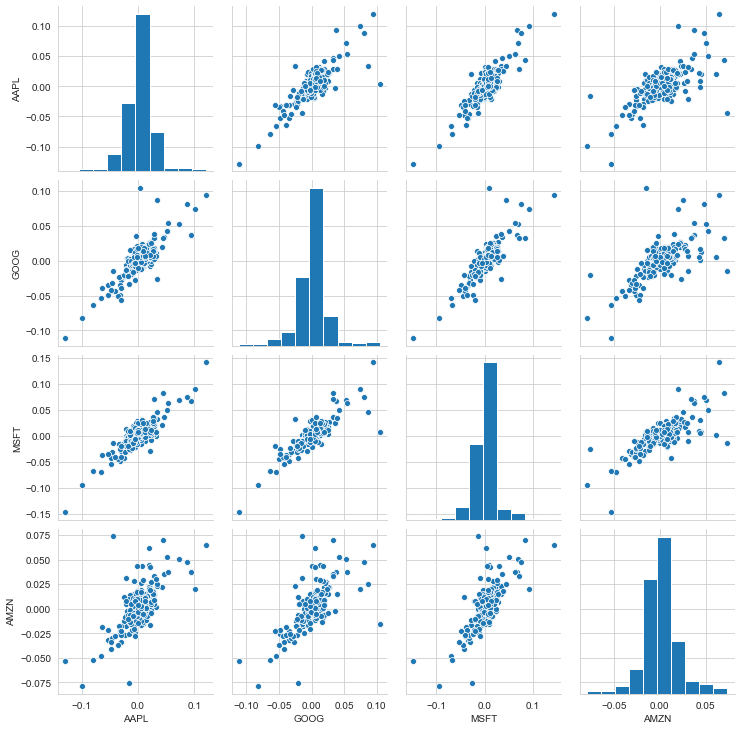

In [21]:
# We can also simply call pairplot on our DataFrame for visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna());

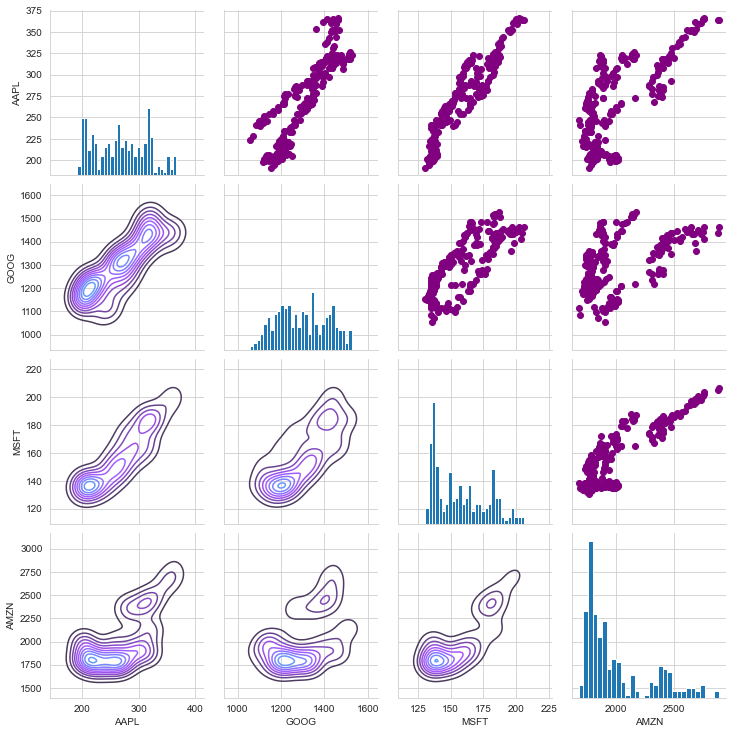

In [22]:
#Another analysis on the closing prices for each stock and their individual comparisons
# Call PairPLot on the DataFrame
close_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
close_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) or the color map (BluePurple)
close_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
close_fig.map_diag(plt.hist,bins=30);

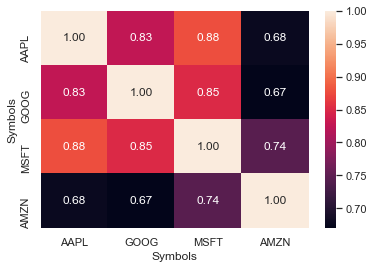

In [27]:
#For a quick look at the correlation analysis for all stocks, we can plot for the daily returns using corrplot
import seaborn as sns
#from seaborn.linearmodels import corrplot as cor
#cor(tech_rets.dropna(),annot=True);
sns.set(style="white")

# Compute the correlation matrix
tech_rets_corr= tech_rets.dropna().corr()
sns.heatmap(tech_rets_corr, annot=True, fmt='.2f')
plt.show()


### Risk Analysis: Bootstraping method, Monte Carlo method

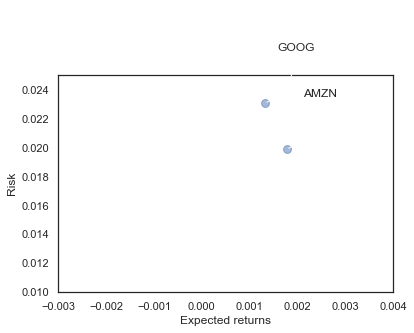

In [28]:
#It is important to note the risk involved with the expected return for each stock visually before starting the analysis
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Setting the x and y limits & plt axis titles
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

As seen in the above plot the less the expected return, lesser the risk involved. Next lets determine the "Value at Risk", that is the worst daily loss that can be encountered with 95 % Confidence.

In [29]:
rets['AAPL'].quantile(0.05)

-0.03425838271082968

The 0.05 empirical quantile of daily returns is at -0.015. That means that with 95% confidence, worst daily loss will not exceed 1.5%. If we have a 1 million dollar investment, our one day 5% VaR is 0.015 * 1,000,000 = $15,000.

### Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is. Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements. This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

$\frac {\Delta{S}}{S} = {\mu \Delta{t}} + {\sigma \epsilon \sqrt{\Delta{t}}} $

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable. We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

$ {\Delta{S}} = S ({\mu \Delta{t}} + {\sigma \epsilon \sqrt{\Delta{t}}}) $

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

In [30]:
# Set up time horizon and delta values
days = 365
dt = 1/days

# Calculate mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Calculate volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [31]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation, mu, sigma and returns simulated price array'''

    price = np.zeros(days)
    price[0] = start_price    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Calculating and returning price array for number of days
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

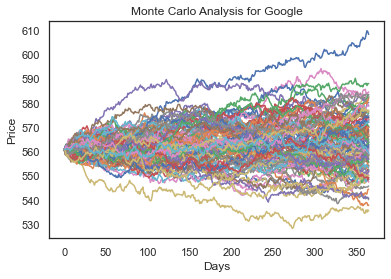

In [32]:
# Get start price from GOOG.head()
start_price = 560.85
simulations = np.zeros(100)

for run in range(100):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google');

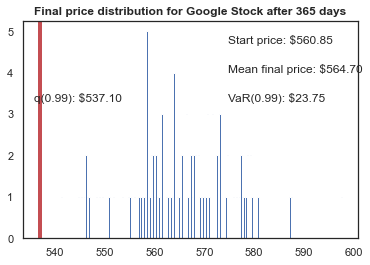

In [33]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

This basically means that for every initial stock you purchase there is about $13.61 at risk 1% of the time as predicted by Monte Carlo Simulation.